In [18]:
from jyro.simulator import (Canvas, Physics, Pioneer, Pioneer16Sonars, PioneerFrontLightSensors,
                            Camera, Simulator, VSimulator, DepthCamera, MyroIR, Color, SequenceViewer)
import numpy as np
from math import pi
from random import random
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## Map definition

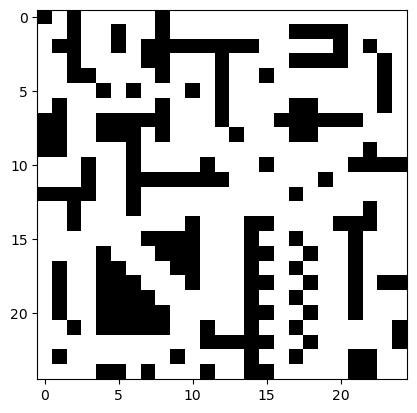

In [19]:
map =[[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
      [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
      [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      [0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
      [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]]

map = np.array(map)

def draw_grid(image, line_space=20):
    H, W = image.shape
    image[0:H:line_space] = 1
    image[:, 0:W:line_space] = 1

plt.imshow(~map, cmap='gray')

In [20]:
np.save('map_2.npy', map)

In [21]:
def image_to_cartesian(map, val):
    coords_y, coords_x = np.where(map == val)
    coords = np.stack([coords_x, coords_y], axis=1)
    coords[:, 1] = (len(map)) - coords[:, 1]

    return coords

obstacle_coords = image_to_cartesian(map, 1)
path_coords = image_to_cartesian(map, 0)

assert len(obstacle_coords)+len(path_coords) == np.prod(map.shape)

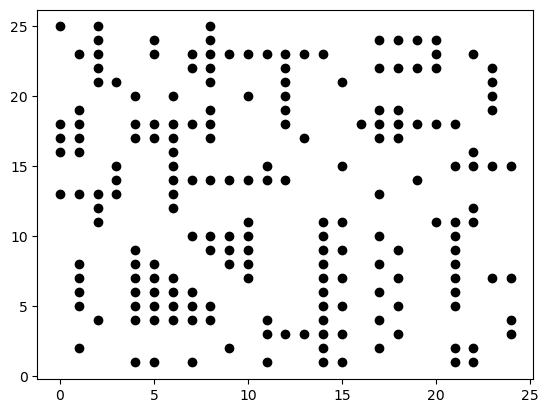

In [22]:
#obstacle_coords_y, obstacle_coords_x = np.where(map==1)
#obstacle_coords = np.stack([obstacle_coords_x, obstacle_coords_y], axis=1)
#obstacle_coords[:, 1] = (len(map)) - obstacle_coords[:, 1]

plt.scatter(obstacle_coords[:, 0], obstacle_coords[:, 1], color='black')
plt.show()

In [23]:
obstacle_boxes = []
for o_p in obstacle_coords:
    ul_x, ul_y = o_p
    lr_x = ul_x + 1
    lr_y = ul_y - 1
    obstacle_boxes.append((ul_x, ul_y, lr_x, lr_y))

In [24]:
def check_box_collision(p, obstacle_boxes):
    for b in obstacle_boxes:
        if p[0] > b[0] - 0.5 and p[0] < b[2] + 0.5 and p[1] > b[3] - 0.5 and p[1] < b[1] + 0.5:
            return True
    return False

## Robot/World calibration

In [25]:
sim = Physics()

def make_world(sim):
    sim.addBox(0, 0, 25, 25, fill='white', wallcolor="black")
    sim.addLight(10, 3, 1.00, color=Color(255, 255, 0, 64))
    
    for i in obstacle_boxes:
        ul_x, ul_y, lr_x, lr_y = i
        sim.addBox(ul_x, ul_y, lr_x, lr_y, fill='black')

make_world(sim)

In [26]:
print(f'World dimensions: {map.shape} meters')

World dimensions: (25, 25) meters


In [27]:
def get_random_start(path_coords, obstacle_boxes):
    collision = True
    while collision:
        x, y = random.choice(path_coords)
        x += random.random()*0.1
        y += random.random()*0.1
        collision = check_box_collision((x, y), obstacle_boxes)

    return x, y, random.random()*2*pi

Use normal distribution for adding noise!

In [28]:
get_random_start(path_coords, obstacle_boxes)

(11.011043222541938, 25.006506370935725, 3.1409804676491007)

In [29]:
## Robot class
class Robot(Pioneer):
    def __init__(self, name, x, y, theta):
        Pioneer.__init__(self, name, x, y, theta)
        self.addDevice(Pioneer16Sonars())
        self.addDevice(MyroIR())

    def get_sensor_data(self):
        sonar_data = self['sonar'].getData()
        ir_data = self['ir'].getData()
        return (sonar_data, ir_data)

def brain(robot):
    sonar_data, ir_data = robot.get_sensor_data()
    print(sonar_data, ir_data)
    #self.move(random.random() * 2 - 1,
    #    random.random() * 2 - 1)
    front = min(sonar_data[1:7])
    print(robot.stall)
    if front < 0.5:           # check for an obstacle
        robot.move(0.0, -1.0) # stop and turn right
    else:
        robot.move(5.0, 0)    # otherwise go straight

# Create robot by giving it a name, x-coordinates, y-coordinates, and a heading angle in radians
robot = Robot('Pioneer', *get_random_start(path_coords, obstacle_boxes))
robot.brain = brain



In [30]:
robot.getPose()

(10.093605076175901, 3.082234139246746, 1.3067277610686554)

In [31]:
robot.get_sensor_data()

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0])

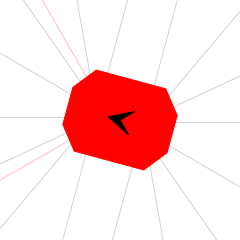

In [32]:
robot

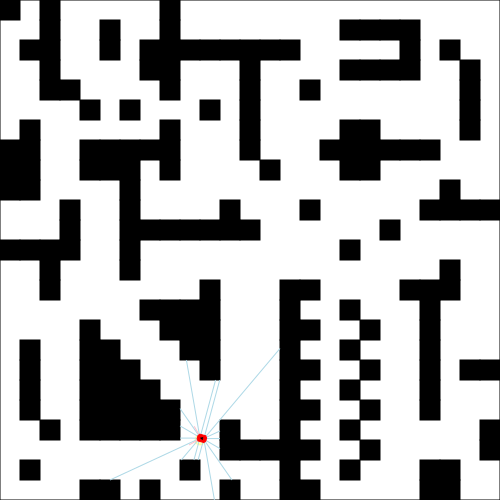

In [33]:
sim.addRobot(robot)
canvas = Canvas((500, 500))
sim.draw(canvas)

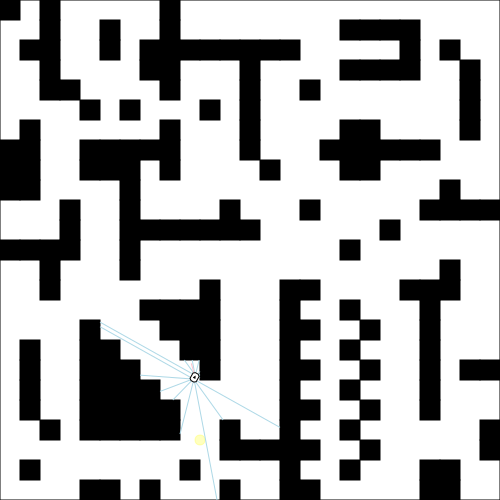

[5.300115779577163, 0.7967378902434918, 0.6512446886983265, 0.6677177888078245, 0.1680149982991398, 0.08238916095051613, 0.05692696232788046, 0.07921635970587099, 4.7745766724823095, 2.354647448821588, 6.009680116167323, 2.698322651549116, 1.33972527275825, 1.6424547100485212, 2.5222682504966554, 5.188221215621764] [0.5, 0.07459415234862617]
1


KeyboardInterrupt: 

In [34]:
%%time

import time

for i in range(1000):
    sim.step(run_brain=True)
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)
        time.sleep(0.05) # sleep for a bit

In [17]:
def generate_data(robot, make_world, trials, filename):
    sim = Simulator(robot, make_world)
    fp = open(filename, "w")
    for i in range(trials):
        print("Trial %d" % i)
        random_start(robot)
        while True:
            senses = get_senses(robot)
            print(senses)
            translate, rotate = determine_move(senses)
            if translate == 0 and rotate == 0:
                break # found light, so end trial
            robot.move(translate, rotate)
            sim.step()
            lights = senses[0]
            sonars = [min(v/3.0, 1.0) for v in senses[1]] #normalize sonar values
            for value in lights:
                fp.write("%.3f " % value)
            for value in sonars[1:7]:
                fp.write("%.3f " % value)
            fp.write("%.1f %.1f\n" % (translate, rotate))
    fp.close()

In [18]:
generate_data(robot, make_world, 5, "testing_data.txt")

Trial 0


NameError: name 'random_start' is not defined